## RF (Classification and Regression) Models

While implementing the decision tree we will go through the following two phases:

1- Building Phase
   * Preprocess the dataset 
   * Split the dataset from train and test using Python sklearn package.
   * Train the classifier.
   
2- Operational Phase
   * Make predictions.
   * Calculate the accuracy.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# This is for regression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor

# This is for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline


from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree

# 1- RF Regression: 

In [79]:
df = pd.read_csv('pollution_us_2000_2016.csv')

# Removing the 'unnamed' col 
df = df.iloc[:, 1:]

In [80]:
df.head()

,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,NO2 Mean,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,22.958333,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


In [81]:
df.shape

(1746661, 28)

- Preprocess the dataset

In [82]:
df.isna().sum()

State Code                0
County Code               0
Site Num                  0
Address                   0
State                     0
County                    0
City                      0
Date Local                0
NO2 Units                 0
NO2 Mean                  0
NO2 1st Max Value         0
NO2 1st Max Hour          0
NO2 AQI                   0
O3 Units                  0
O3 Mean                   0
O3 1st Max Value          0
O3 1st Max Hour           0
O3 AQI                    0
SO2 Units                 0
SO2 Mean                  0
SO2 1st Max Value         0
SO2 1st Max Hour          0
SO2 AQI              872907
CO Units                  0
CO Mean                   0
CO 1st Max Value          0
CO 1st Max Hour           0
CO AQI               873323
dtype: int64

In [83]:
# dropping the unnecessary columns 

unnColumns = ['SO2 AQI', 'State Code','County Code','Site Num','Address','NO2 Units','O3 Units','SO2 Units','CO Units']
df.drop(columns= unnColumns , inplace = True)

# Delete rows with NAs
df = df.dropna(axis='rows')  

In [84]:
df.describe()

,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
count,873338.000000,873338.000000,873338.000000,873338.000000,873338.000000,873338.000000,873338.000000,873338.000000,873338.000000,873338.000000,873338.000000,873338.000000,873338.000000,873338.000000,873338.000000
mean,12.822721,25.416851,11.731223,23.900144,0.026124,0.039203,10.170469,36.050149,1.870685,4.493011,9.664998,0.369740,0.529251,6.255429,5.996595
std,9.504904,16.000017,7.877525,15.163193,0.011369,0.015344,4.002893,19.780627,2.760914,7.680965,6.731092,0.316373,0.509984,7.842127,5.851836
min,-2.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,-2.000000,0.000000,-0.437500,-0.400000,0.000000,0.000000
25%,5.750000,13.000000,5.000000,12.000000,0.017875,0.029000,9.000000,25.000000,0.256522,0.800000,5.000000,0.191667,0.200000,0.000000,2.000000
50%,10.739130,24.000000,9.000000,23.000000,0.025875,0.038000,10.000000,33.000000,0.987500,2.000000,8.000000,0.295833,0.400000,2.000000,5.000000
75%,17.714286,35.700000,20.000000,33.000000,0.033909,0.048000,11.000000,42.000000,2.325000,5.000000,14.000000,0.470833,0.700000,10.000000,8.000000
max,139.541667,267.000000,23.000000,132.000000,0.095083,0.141000,23.000000,218.000000,321.625000,351.000000,23.000000,7.508333,15.500000,23.000000,201.000000



     the sum of nulls is centred in the 'CO AQI' after using df.describe() 
     we notice that difference between the avg & max is huge and would not
     make sense to replace null values with avg value, instead we can drop and
     train the model on the existed data   


In [90]:
df_cleaned.shape

(873338, 19)

In [91]:
df_cleaned.dtypes

State                 object
County                object
City                  object
Date Local            object
NO2 Mean             float64
NO2 1st Max Value    float64
NO2 1st Max Hour       int64
NO2 AQI                int64
O3 Mean              float64
O3 1st Max Value     float64
O3 1st Max Hour        int64
O3 AQI                 int64
SO2 Mean             float64
SO2 1st Max Value    float64
SO2 1st Max Hour       int64
CO Mean              float64
CO 1st Max Value     float64
CO 1st Max Hour        int64
CO AQI               float64
dtype: object

In [92]:
df_cleaned.isna().sum()

State                0
County               0
City                 0
Date Local           0
NO2 Mean             0
NO2 1st Max Value    0
NO2 1st Max Hour     0
NO2 AQI              0
O3 Mean              0
O3 1st Max Value     0
O3 1st Max Hour      0
O3 AQI               0
SO2 Mean             0
SO2 1st Max Value    0
SO2 1st Max Hour     0
CO Mean              0
CO 1st Max Value     0
CO 1st Max Hour      0
CO AQI               0
dtype: int64

In [93]:
# looking into corr between col to decide on which cols to use in featureset

corr = df_cleaned.corr()
corr.style.background_gradient(cmap='coolwarm')

,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
NO2 Mean,1.000000,0.904378,0.112575,0.905413,-0.432672,-0.151993,0.027256,-0.082357,0.348169,0.281935,0.117444,0.637992,0.656520,0.245892,0.661031
NO2 1st Max Value,0.904378,1.000000,0.147982,0.997860,-0.291844,0.009868,0.022393,0.048737,0.301589,0.261994,0.131081,0.558780,0.605721,0.288338,0.611550
NO2 1st Max Hour,0.112575,0.147982,1.000000,0.147199,-0.203153,-0.090471,-0.125680,-0.086772,0.027121,0.021731,0.173742,0.038061,0.056494,0.301186,0.057663
NO2 AQI,0.905413,0.997860,0.147199,1.000000,-0.291732,0.010322,0.022338,0.049020,0.305190,0.265050,0.129945,0.561682,0.608611,0.288653,0.614445
O3 Mean,-0.432672,-0.291844,-0.203153,-0.291732,1.000000,0.860610,0.045780,0.768757,-0.110416,-0.072470,-0.083138,-0.331211,-0.353442,-0.217403,-0.355314
O3 1st Max Value,-0.151993,0.009868,-0.090471,0.010322,0.860610,1.000000,0.055552,0.931868,-0.016091,0.025365,-0.015703,-0.178688,-0.180505,-0.101891,-0.179301
O3 1st Max Hour,0.027256,0.022393,-0.125680,0.022338,0.045780,0.055552,1.000000,0.048425,0.026537,0.027544,-0.025061,0.017285,0.006702,-0.086661,0.008648
O3 AQI,-0.082357,0.048737,-0.086772,0.049020,0.768757,0.931868,0.048425,1.000000,0.015538,0.044317,0.000925,-0.126474,-0.131425,-0.078973,-0.130092
SO2 Mean,0.348169,0.301589,0.027121,0.305190,-0.110416,-0.016091,0.026537,0.015538,1.000000,0.828451,0.129427,0.214334,0.200783,0.085377,0.204040
SO2 1st Max Value,0.281935,0.261994,0.021731,0.265050,-0.072470,0.025365,0.027544,0.044317,0.828451,1.000000,0.136996,0.148882,0.146596,0.068239,0.149964


-  Selecting the feature & target set 
-  Split the dataset from train and test using Python sklearn package.

In [94]:
'''
  --> The variable X contains the attributes (highly correlated with target --> 0.6), 
       NOTE: I avoied using 0.9 bc it could be data leakage. 
  
  --> While the variable Y contains the target variable of the dataset.

'''
vars = ['NO2 Mean', 'NO2 1st Max Value', 'NO2 AQI' ]
target = 'CO AQI'

X = df[vars]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

In [95]:
print(X_train.shape)
print(X_test.shape)

(655003, 3)
(218335, 3)


## Random Forest For Regression


-  Building method for RF Regression 

In [96]:
# Function to perform training with RandomForestRegressor
def tarin_using_RFR(X_train, y_train):
  
    reg_forest = RandomForestRegressor(n_estimators = 10, random_state = 0, criterion = 'mse')
    reg_forest.fit(X_train, y_train)
    print(reg_forest.feature_importances_)

    return reg_forest

In [116]:
# Function to perform training with RandomForestRegressor 
def tarin_using_RFR_Grid(X_train, y_train):
  
    reg_forest = RandomForestRegressor(n_estimators = 5, max_depth = 6,random_state = 0, criterion = 'mse')
    reg_forest.fit(X_train, y_train)
    print(reg_forest.feature_importances_)

    return reg_forest

-  Building method for prediction 

In [104]:
def prediction(X_test, clf_object):
  
    # Predicton on test with RFR
    preds_forest = clf_object.predict(X_test)
    print("Predicted values:")
    print(preds_forest)
    return preds_forest

-  Building method for Cost Function  

In [105]:
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
      
    print("MSE: ",
        mean_absolute_error(y_true=y_test, y_pred=y_pred))

- Training the Model

In [99]:
clf_RFR = tarin_using_RFR(X_train, y_train)

[0.8214676  0.12052582 0.05800658]


We can see that the first col = 'NO2 Mean' is the most impotrant feature for the target

- Training results 

In [106]:
# Prediction using RFR

print("Results Using RF Regression:")

y_pred_RF = prediction(X_test, clf_RFR)
cal_accuracy(y_test, y_pred_RF)

Results Using RF Regression:
Predicted values:
[2.71421415 9.11714679 4.75333333 ... 4.23919529 6.28332973 2.9       ]
MSE:  2.303363980972794


# Optional Task:
- Create a Random Forest using Grid Seach to optimize your hyperparameters

In [109]:
# Regression
# repeat this

param_grid2 = {
    "n_estimators": [5,6,10], # how many trees in our forest  1
    "max_depth": [2,4,6] # how deep each decision tree can be
    
    
}
grid2 = GridSearchCV(
    clf_RFR,
    param_grid2,
    cv = 5,
    n_jobs= -1,
    verbose= 1,
    scoring="neg_mean_absolute_error"
)

grid2.fit(X_train, y_train)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=10, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6], 'n_estimators': [5, 6, 10]},
             scoring='neg_mean_absolute_error', verbose=1)

In [110]:
grid2.best_params_

{'max_depth': 6, 'n_estimators': 10}

In [111]:
grid2.best_estimator_.estimators_

[DecisionTreeRegressor(max_depth=6, max_features='auto', random_state=209652396),
 DecisionTreeRegressor(max_depth=6, max_features='auto', random_state=398764591),
 DecisionTreeRegressor(max_depth=6, max_features='auto', random_state=924231285),
 DecisionTreeRegressor(max_depth=6, max_features='auto', random_state=1478610112),
 DecisionTreeRegressor(max_depth=6, max_features='auto', random_state=441365315),
 DecisionTreeRegressor(max_depth=6, max_features='auto', random_state=1537364731),
 DecisionTreeRegressor(max_depth=6, max_features='auto', random_state=192771779),
 DecisionTreeRegressor(max_depth=6, max_features='auto', random_state=1491434855),
 DecisionTreeRegressor(max_depth=6, max_features='auto', random_state=1819583497),
 DecisionTreeRegressor(max_depth=6, max_features='auto', random_state=530702035)]

In [112]:
grid_df = pd.DataFrame(grid2.cv_results_)

grid_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.296173,0.075829,0.028983,0.001962,2,5,"{'max_depth': 2, 'n_estimators': 5}",-2.841329,-2.830343,-2.868153,-2.853230,-2.863893,-2.851390,0.014035,9
1,1.717669,0.037965,0.031761,0.000940,2,6,"{'max_depth': 2, 'n_estimators': 6}",-2.840248,-2.831441,-2.867080,-2.851664,-2.865908,-2.851268,0.013993,8
2,2.751906,0.036236,0.049133,0.003020,2,10,"{'max_depth': 2, 'n_estimators': 10}",-2.837581,-2.830226,-2.863731,-2.849066,-2.863330,-2.848787,0.013454,7
3,2.572461,0.029672,0.045648,0.007202,4,5,"{'max_depth': 4, 'n_estimators': 5}",-2.705393,-2.695896,-2.713975,-2.708978,-2.718309,-2.708510,0.007680,6
4,3.084822,0.015524,0.048233,0.002314,4,6,"{'max_depth': 4, 'n_estimators': 6}",-2.704810,-2.694516,-2.712175,-2.708824,-2.717917,-2.707648,0.007846,5
5,5.253488,0.037480,0.098587,0.026468,4,10,"{'max_depth': 4, 'n_estimators': 10}",-2.703055,-2.693388,-2.709555,-2.708537,-2.716984,-2.706304,0.007836,4
6,3.974345,0.218935,0.057126,0.005505,6,5,"{'max_depth': 6, 'n_estimators': 5}",-2.687642,-2.681588,-2.692082,-2.697889,-2.705215,-2.692883,0.008159,3
7,4.952964,0.072051,0.063468,0.003442,6,6,"{'max_depth': 6, 'n_estimators': 6}",-2.688163,-2.681272,-2.691683,-2.697811,-2.705094,-2.692805,0.008147,2
8,5.740047,0.736024,0.071485,0.004707,6,10,"{'max_depth': 6, 'n_estimators': 10}",-2.687499,-2.680550,-2.691327,-2.697280,-2.704006,-2.692132,0.008047,1


In [115]:
parameters = ['param_max_depth','param_n_estimators','mean_test_score','rank_test_score']
grid_df[parameters].sort_values(by = ['rank_test_score'])

,param_max_depth,param_n_estimators,mean_test_score,rank_test_score
8,6,10,-2.692132,1
7,6,6,-2.692805,2
6,6,5,-2.692883,3
5,4,10,-2.706304,4
4,4,6,-2.707648,5
3,4,5,-2.708510,6
2,2,10,-2.848787,7
1,2,6,-2.851268,8
0,2,5,-2.851390,9


6 ---> Could be our best option because we got same result with less computations 

In [117]:
# retrining the model with hyperp tuning
clf_RFR = tarin_using_RFR_Grid(X_train, y_train)

[0.94283885 0.03311667 0.02404448]


In [118]:
# Prediction using RFR

print("Results Using RF Regression:")

y_pred_RF = prediction(X_test, clf_RFR)
cal_accuracy(y_test, y_pred_RF)

Results Using RF Regression:
Predicted values:
[2.46383856 7.86508007 9.44982919 ... 5.25839479 5.00863189 3.15437583]
MSE:  2.6795244783019596


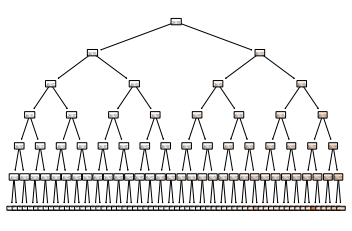

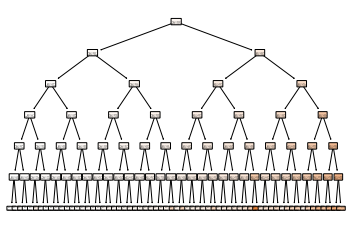

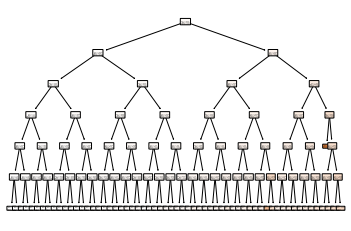

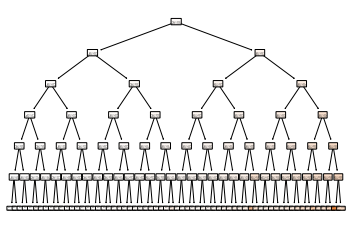

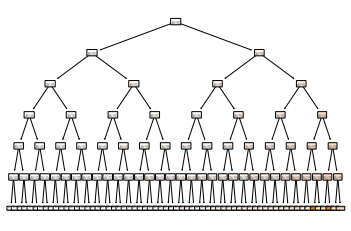

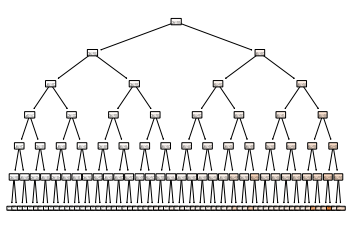

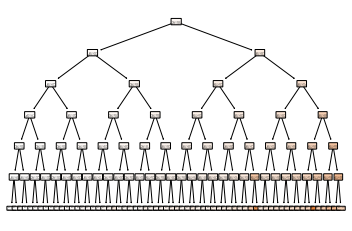

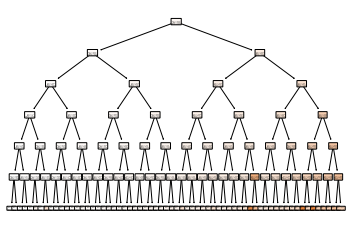

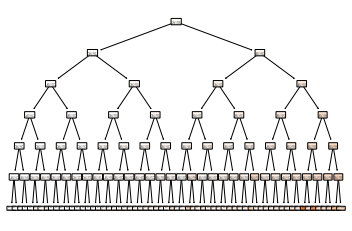

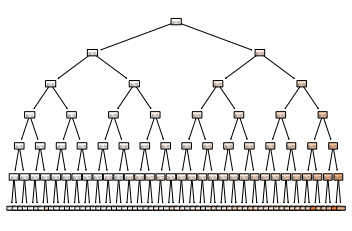

In [119]:
# Plot the Decision Trees from the Grid Search Random Forest

for x in range(len(grid2.best_estimator_.estimators_)):
    tree.plot_tree(
    grid2.best_estimator_.estimators_[x], # Access each individual estimator
    filled=True,
    rounded=True,
    )
    plt.show()

# 2- RF Classification: 